# Fractional Brownian Motion Parameter Estimation Using Variance Aggregation

Consider a time series of $n$, identically distributed samples,</br>

$
\begin{align}
X_1, X_2,X_3,\ldots,X_n
\end{align}
$

Divide the series into $d$ smaller series of length $m$ where $md=n$.\ and let,</br>
$k = 0,1,2,3,\ldots,d-1$ and define the aggregated sum by,

$
\begin{align}
X_k^m &= \frac{1}{m}\left( X_{km+1} + X_{km+2} + \cdots + X_{km+m-1} + X_{km+m} \right) \\
&= \frac{1}{m} \left( X_{km+1} + \cdots + X_{(k+1)m} \right) \\
&= \frac{1}{m} \sum_{i=km+1}^{(k+1)m} X_i
\end{align}
$

The aggregated mean is given by,

$
\begin{align}
\text{E}[X^m] &= \frac{1}{d}\sum_{i=1}^d X_i^m \\
&= \frac{1}{dm} \sum_{i=1}^d \sum_{j=im+1}^{(k+1)i} X_j \\
&= \frac{1}{n} \sum_{i=1}^n X_i
\end{align}
$

and the aggregated variance by,

$
\begin{align}
\text{Var}[X^m] = \frac{1}{d} \sum_{i=1}^d\left( X^m_i - \text{E}[X^m] \right)^2
\end{align}
$

This method makes use of the self similarity of fractional brownian motion. Consider the aggregated process,

$
\begin{align}
X_0^m = \frac{1}{m} \sum_{i=1}^m X_i
\end{align}
$

From self similarity of fractional brownian motion,

$
\begin{align}
X_{ai} \sim a^H X_i
\end{align}
$

Since the distribution of the sum of Gaussian random variables is the distribution of the last it follows that,</br> 

$
\begin{align}
X_0^m \sim \frac{1}{m} X_m \sim \frac{m^H}{m} X_1 = m^{H-1} X_1
\end{align}
$

For fractional brownian noise,

$
\begin{align}
&\text{E}[\Delta Z^H_t] = 0 \\
&\text{Var}[\Delta Z^H_t] = \Delta t^{2H}
\end{align}
$

$X_1$ is a single increment of brownian motion it follows that,

$
\begin{align}
\text{Var}[X_1] = \Delta t^{2H} = \sigma^2
\end{align}
$

so,

$
\begin{align}
\text{Var}[X_0^m] = \text{Var}[m^{H-1} X_1] = m^{2(H-1)}\text{Var}[X_1] = \sigma^2 m^{2(H-1)}
\end{align}
$

From stationarity of it follows that,

$
\begin{align}
\text{Var}[X_k^m] = \sigma^2 m^{2(H-1)}
\end{align}
$


## Imports

In [365]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import fbm
from lib import bm
from lib import plots
from lib import config
from lib import stats

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Helpers

In [366]:
Δt = 1.0
npts = 2**10
nagg = 100
m = [1, 10, 50]

## Simulation $H=0.8$

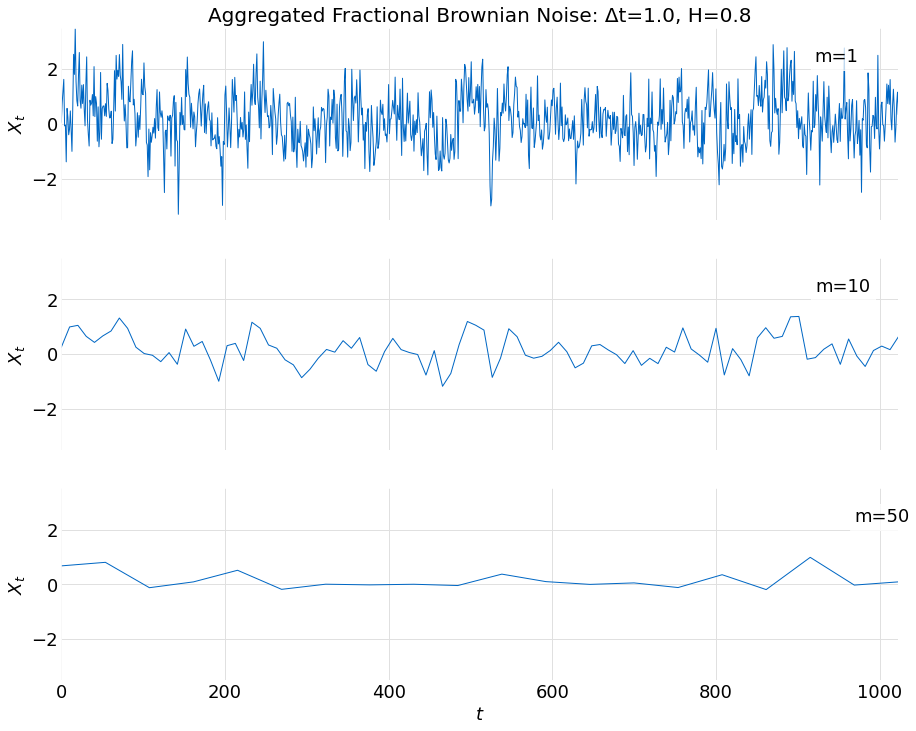

In [367]:
H = 0.8

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.time_series_stack(series, [-3.5, 3.5], labels, title, time)

In [368]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, stats.RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1285.
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           3.83e-58
Time:                        12:14:57   Log-Likelihood:                 138.01
No. Observations:                 100   AIC:                            -272.0
Df Residuals:                      98   BIC:                            -266.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2781      0.032      8.687      0.000       0.215       0.342
x1            -0.7484      0.021    -35.853      0.000      -0.790      -0.707
==============================================================================
Omnibus:                        7.508   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.023   Jarque-Bera (JB):               12.472
Skew:                          -0.214   Prob(JB):                      0.00196
Kurtosis:                       4.677   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

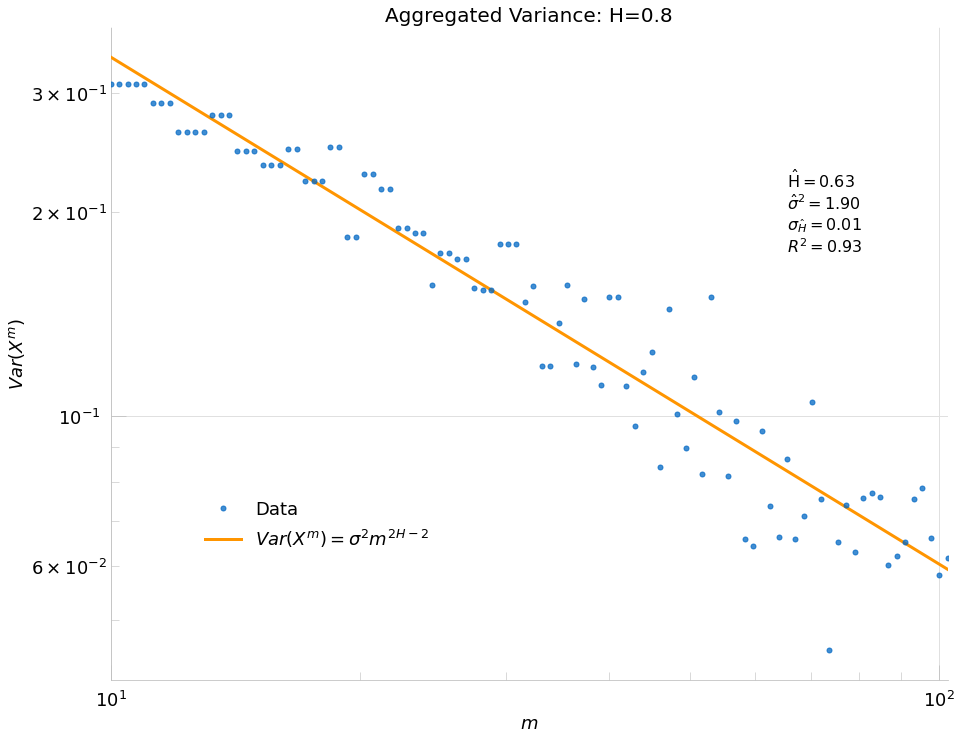

In [369]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title, plots.RegressionPlotType.FBM_AGG_VAR)

## Simulation $H=0.6$

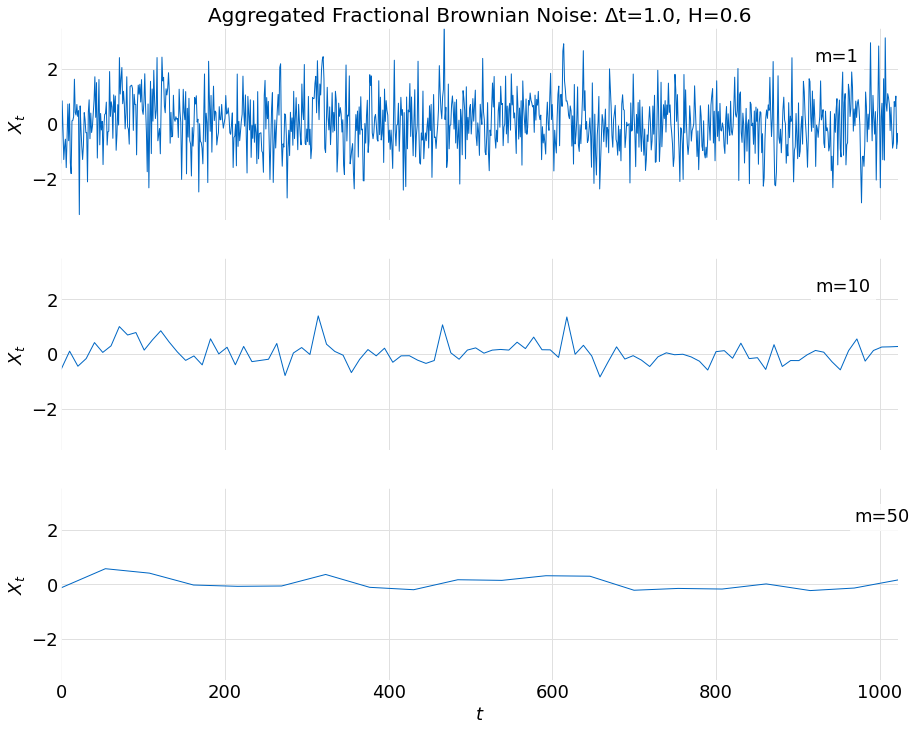

In [370]:
H = 0.6

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.time_series_stack(series, [-3.5, 3.5], labels, title, time)

In [371]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, stats.RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     1411.
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           5.39e-60
Time:                        12:14:58   Log-Likelihood:                 140.37
No. Observations:                 100   AIC:                            -276.7
Df Residuals:                      98   BIC:                            -271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0034      0.031     -0.110      0.913      -0.065       0.059
x1            -0.7658      0.020    -37.565      0.000      -0.806      -0.725
==============================================================================
Omnibus:                       12.489   Durbin-Watson:                   0.590
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               27.408
Skew:                          -0.376   Prob(JB):                     1.12e-06
Kurtosis:                       5.452   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

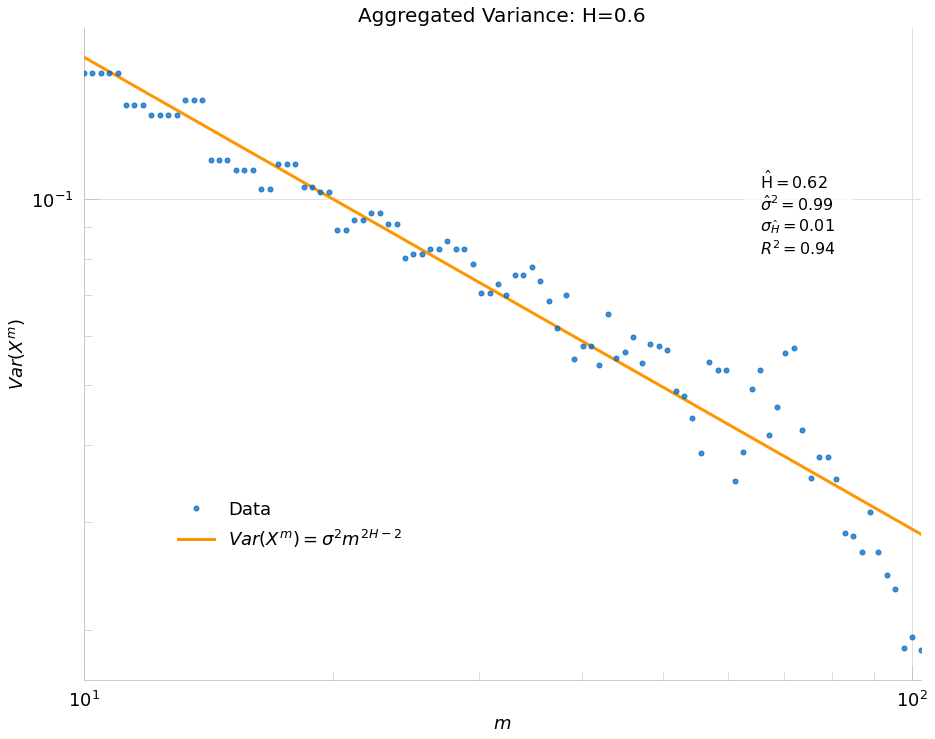

In [372]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title, plots.RegressionPlotType.FBM_AGG_VAR)

## Simulation $H=0.4$

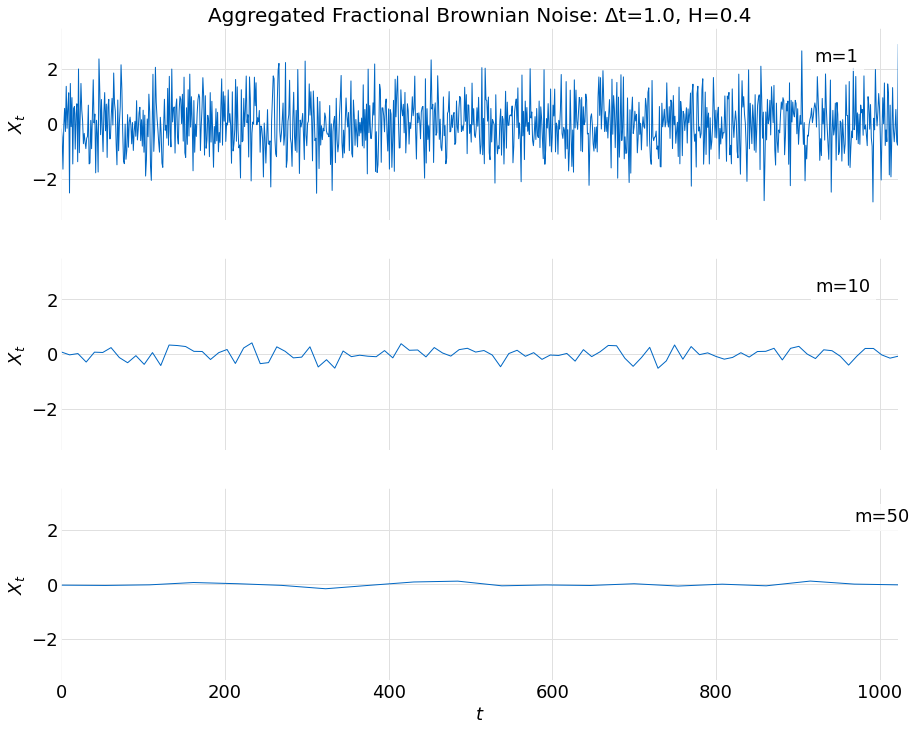

In [373]:
H = 0.4

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.time_series_stack(series, [-3.5, 3.5], labels, title, time)

In [374]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, stats.RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1181.
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           1.78e-56
Time:                        12:14:59   Log-Likelihood:                 80.031
No. Observations:                 100   AIC:                            -156.1
Df Residuals:                      98   BIC:                            -150.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0663      0.057      1.160      0.249      -0.047       0.180
x1            -1.2810      0.037    -34.370      0.000      -1.355      -1.207
==============================================================================
Omnibus:                        4.244   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.120   Jarque-Bera (JB):                3.792
Skew:                          -0.472   Prob(JB):                        0.150
Kurtosis:                       3.138   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

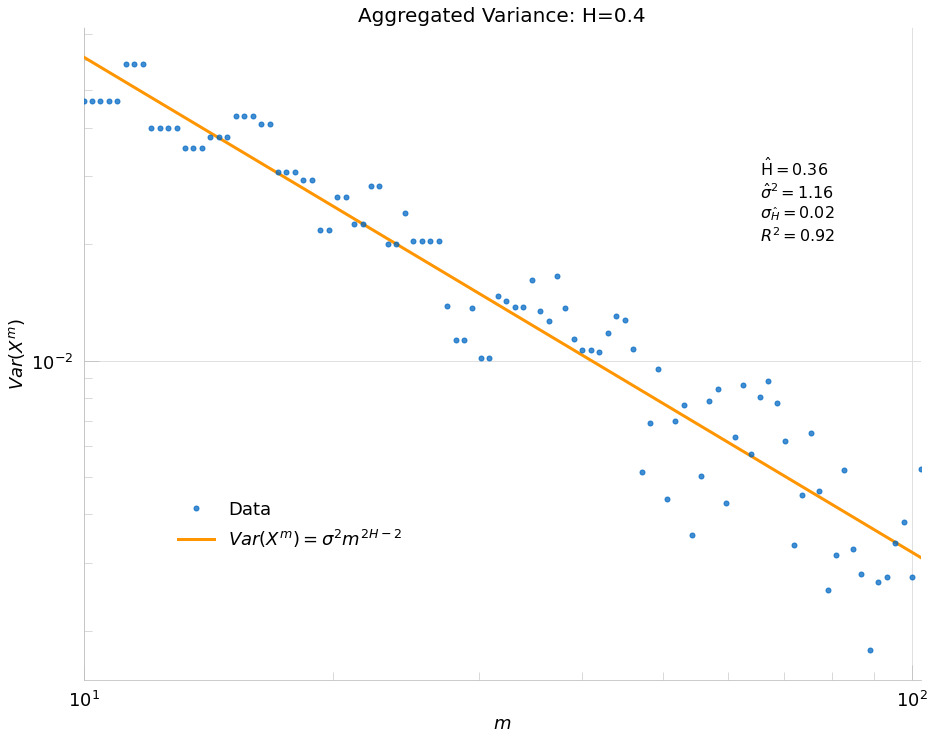

In [375]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title, plots.RegressionPlotType.FBM_AGG_VAR)

## Simulation $H=0.2$

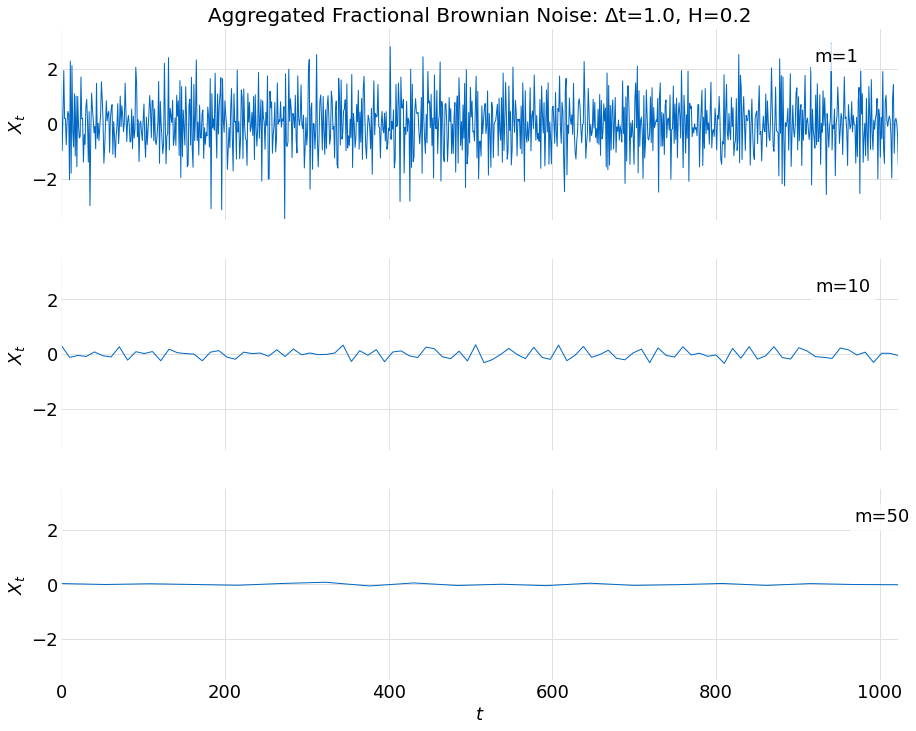

In [376]:
H = 0.2

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.time_series_stack(series, [-3.5, 3.5], labels, title, time)

In [377]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, stats.RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     2836.
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           3.75e-74
Time:                        12:15:01   Log-Likelihood:                 86.091
No. Observations:                 100   AIC:                            -168.2
Df Residuals:                      98   BIC:                            -163.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3348      0.054      6.223      0.000       0.228       0.442
x1            -1.8683      0.035    -53.258      0.000      -1.938      -1.799
==============================================================================
Omnibus:                       38.285   Durbin-Watson:                   1.608
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.803
Skew:                          -0.896   Prob(JB):                     1.94e-63
Kurtosis:                      11.130   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

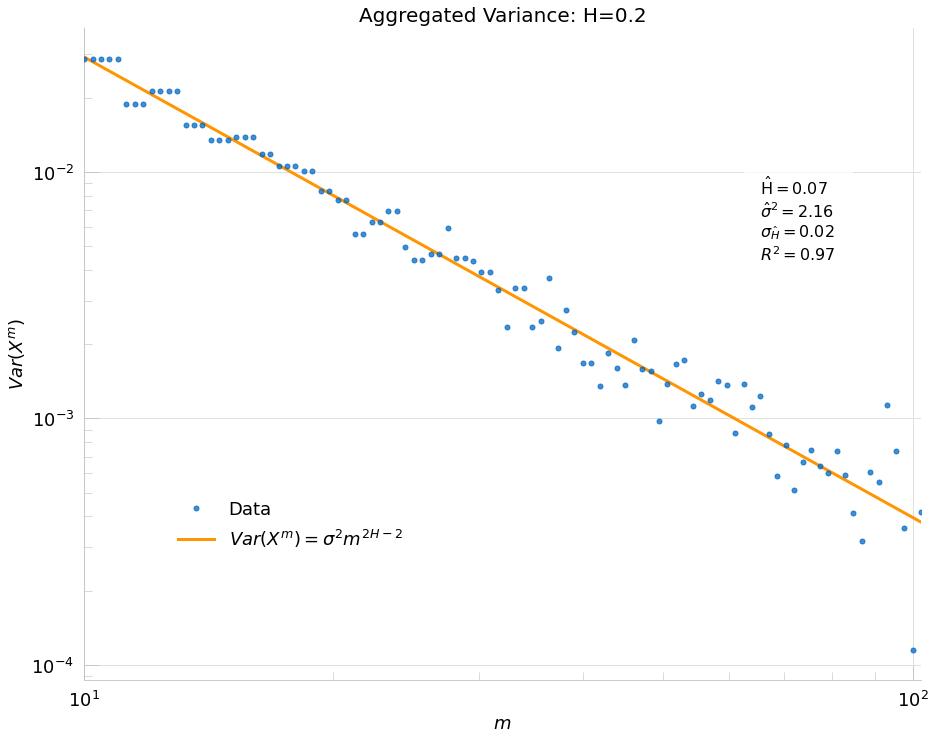

In [378]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title, plots.RegressionPlotType.FBM_AGG_VAR)